In [ ]:
import tensorflow as tt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
IMG_SIZE=224
BATCH_SIZE=32

In [ ]:
train_datagen=ImageDataGenerator(rescale = 1./255,validation_split=0.2)
train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/plantleafdetection/data',target_size=(IMG_SIZE,IMG_SIZE),batch_size=BATCH_SIZE,class_mode='binary',subset='training')
val_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/plantleafdetection/data',target_size=(IMG_SIZE,IMG_SIZE),batch_size=BATCH_SIZE,class_mode='binary',subset='training')


Found 142 images belonging to 2 classes.
Found 142 images belonging to 2 classes.


In [ ]:
model=keras.Sequential([layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),layers.MaxPooling2D((2,2)),
 layers.Conv2D(64,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE)),layers.MaxPooling2D((2,2)),
 layers.Conv2D(128,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE)),layers.MaxPooling2D((2,2)),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(1, activation='sigmoid')])





In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator,batch_size=BATCH_SIZE)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 5s/step - accuracy: 0.4674 - loss: 1.2911 - val_accuracy: 0.9930 - val_loss: 0.5924
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.7877 - loss: 0.5743 - val_accuracy: 0.9930 - val_loss: 0.2739
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.9866 - loss: 0.2039 - val_accuracy: 0.9930 - val_loss: 0.0291
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.9977 - loss: 0.0164 - val_accuracy: 0.9930 - val_loss: 0.0110
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.9977 - loss: 0.0109 - val_accuracy: 1.0000 - val_loss: 0.0040


In [ ]:
model.save('/content/drive/MyDrive/plantleaf/PlantLeafDectection.h5')

In [ ]:
 from tensorflow.keras.models import load_model
 from tensorflow.keras.preprocessing import image
 import numpy as np
 import matplotlib.pyplot as plt
 model=load_model('/content/drive/MyDrive/plantleaf/PlantLeafDectection.h5')
 print('model loaded')

model loaded


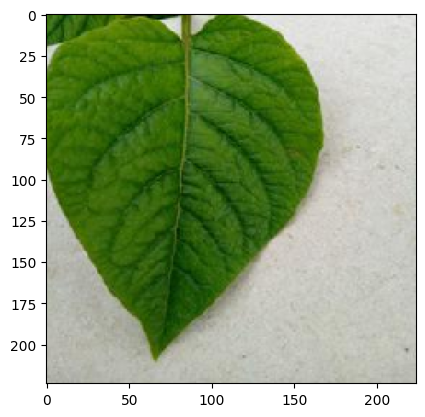

In [ ]:
test_image_path="/content/drive/MyDrive/plantleafdetection/data/healthy/Healthy (406).jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()


In [ ]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /= 255

In [ ]:
prediction=model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[0.9960241]]


In [ ]:
if prediction >=0.5:
   print("leaf is diseased")
else:
   print("leaf is healthy")

leaf is diseased


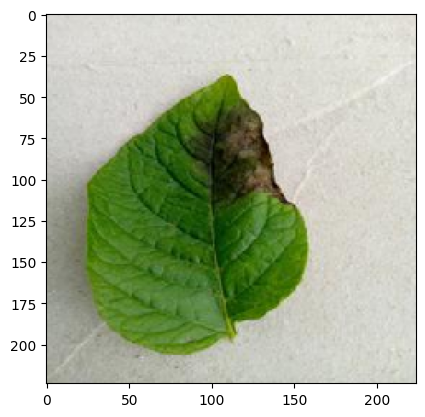

In [ ]:
test_image_path="/content/drive/MyDrive/plantleafdetection/data/unhealthy/Late_Blight (449).jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()


In [ ]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /= 255

In [ ]:
prediction=model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
[[0.7574499]]


In [ ]:
if prediction >=0.5:
   print("leaf is diseased")
else:
   print("leaf is healthy")

leaf is diseased
